In [1]:
path = "../input/chest_xray/chest_xray/"
print(path)

../input/chest_xray/chest_xray/


In [2]:
from fastai import *
from fastai.vision import *

In [3]:
# set the batch size i.e. the number of images to train at a time
# reduce this number if you get an out of memory error 
bs = 64

In [4]:
# create a data bunch
np.random.seed(42)
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=False), 
                                  size=224, num_workers=0, 
                                  bs=bs, valid_pct=0.2).normalize(imagenet_stats)

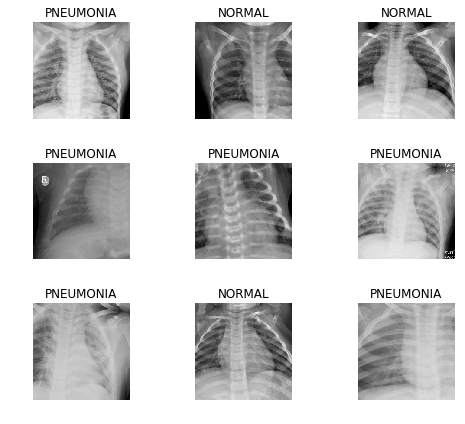

In [5]:
# display 3 rows of data
data.show_batch(rows=3, figsize=(7,6))

In [6]:
# verify the classes
print(data.classes)
len(data.classes),data.c

['NORMAL', 'PNEUMONIA']


(2, 2)

In [7]:
# create a neural network
learn = create_cnn(data, models.resnet34, metrics=error_rate, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 83160227.87it/s]


In [8]:
# fit 4 layers
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.361536,0.266853,0.084543
2,0.240727,0.234448,0.086251
3,0.182859,0.180425,0.060632
4,0.155202,0.186489,0.062340


In [9]:
# interpret the results
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

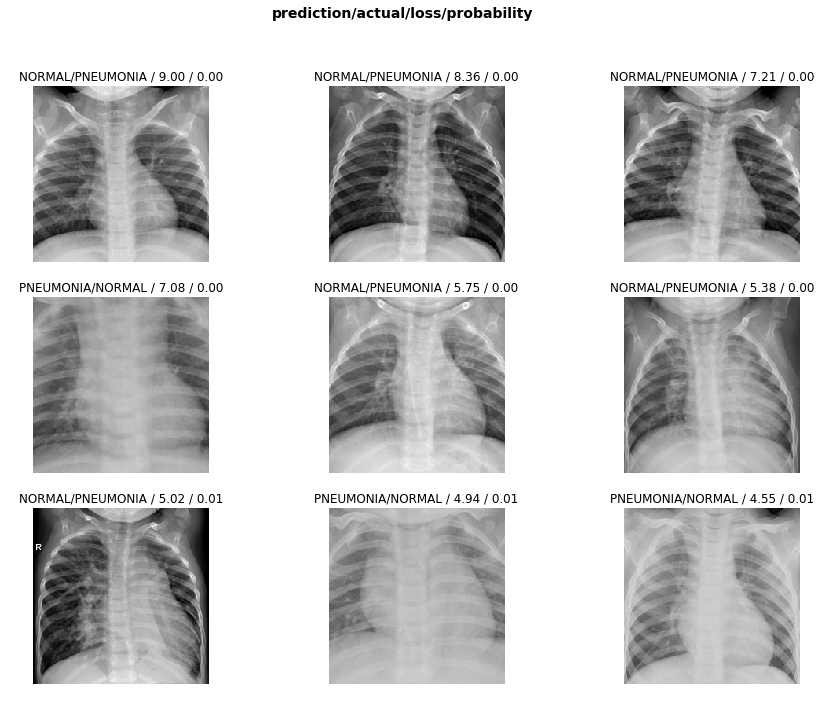

In [10]:
# plot the top losses
interp.plot_top_losses(9, figsize=(15,11))

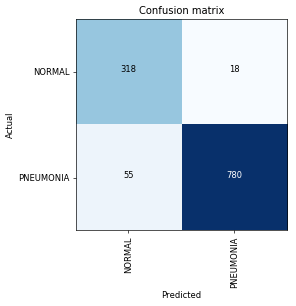

In [11]:
# plot the confusion matrix
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

The number of samples that were pneumonia but predicted as normal is a lot (55) and hence we will train the model more!

In [12]:
learn.save('stage-1')

In [13]:
learn.unfreeze()

In [14]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.139159,0.111749,0.040991


In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


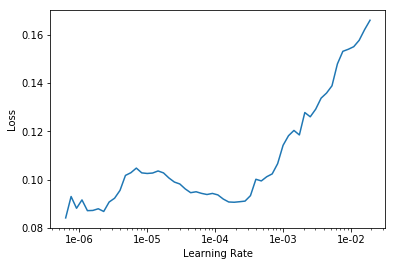

In [16]:
learn.recorder.plot()

In [17]:
# we select the slice with the steepest slope
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate
1,0.163651,0.121126,0.036721


In [18]:
# interpret the results
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

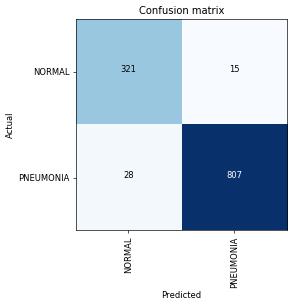

In [19]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

We have managed to significantly reduce the error rate and predict the Pneumonia cases correctly which is the class we care about!